<a href="https://colab.research.google.com/github/nlajunior/quarentenadados/blob/master/Notebook_aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula ll

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Importando base de dados filmes

In [0]:
filmes=pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')

In [0]:
filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


### Renomeando colunas

In [0]:
filmes.columns=['filmeId', 'titulo', 'generos']

In [0]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Importando base dados raitings

In [0]:
avaliacoes = pd.read_csv('https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true')

In [0]:
avaliacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [0]:
avaliacoes.columns=['usuarioId','filmeId', 'nota', 'momento']

### Calculando as médias por filme

In [0]:
medias_dos_filmes=avaliacoes.groupby('filmeId')['nota'].mean()
type(medias_dos_filmes)

pandas.core.series.Series

### Calculando o total de votos

In [0]:
total_de_votos=avaliacoes.groupby('filmeId')['nota'].count()
type(total_de_votos)

pandas.core.series.Series

In [0]:
total_de_votos.head()

filmeId
1    215
2    110
3     52
4      7
5     49
Name: nota, dtype: int64

In [0]:
medias_dos_filmes.round(2).head()

filmeId
1    3.92
2    3.43
3    3.26
4    2.36
5    3.07
Name: nota, dtype: float64

### Inserindo a coluna nota_media

In [0]:
filmes_com_medias= filmes.join(medias_dos_filmes, on='filmeId')
filmes_com_medias.rename(columns={'nota':'nota_media'}, inplace=True)
filmes_com_medias.round(2).head()


,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07


### Inserindo a coluna total_de_votos

In [0]:
filmes_com_medias_e_votos=filmes_com_medias.join(total_de_votos, on='filmeId')
filmes_com_medias_e_votos.rename(columns={'nota':'total_de_votos'}, inplace=True)
filmes_com_medias_e_votos.round(2).head()

,filmeId,titulo,generos,nota_media,total_de_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


### Quantidade de filmes por genêros em ordem descrescente

In [0]:
filmes_por_genero=filmes['generos'].str.get_dummies('|').sum()
filmes_por_genero.sort_values(ascending=False, inplace=True)
type(filmes_por_genero)



pandas.core.series.Series

In [0]:
notas_filmes_1= avaliacoes.query('filmeId==1')['nota']
media_filme_1=notas_filmes_1.mean()
print(media_filme_1)

3.9209302325581397


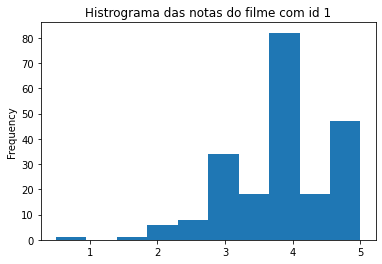

In [0]:
notas_filmes_1.plot(kind='hist',
                    title='Histrograma das notas do filme com id 1')
plt.show()

In [0]:
notas_filmes_2= avaliacoes.query('filmeId==2')['nota']
media_filme_2=notas_filmes_2.mean()
print(f'Média do filme: {media_filme_2}')

Média do filme: 3.4318181818181817


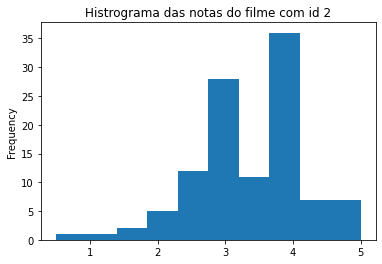

In [0]:
notas_filmes_2.plot(kind='hist',
                    title='Histrograma das notas do filme com id 2')
plt.show()

### Criando uma função para plotar

In [0]:
def plota_grafico(n):
  notas_do_filme= avaliacoes.query(f'filmeId=={n}')['nota']
  notas_do_filme.plot(kind='hist',
                    title='Histrograma das notas do filme')
  plt.show()
  
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

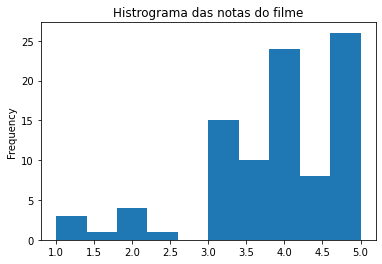

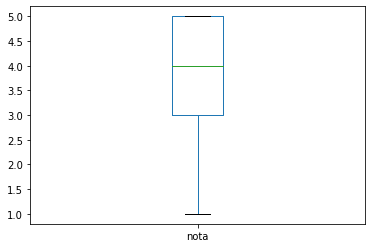

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [0]:
plota_grafico(919)

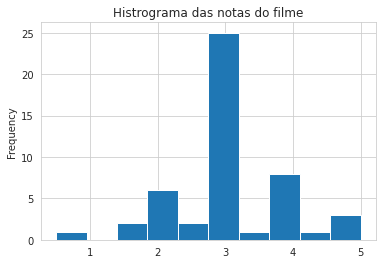

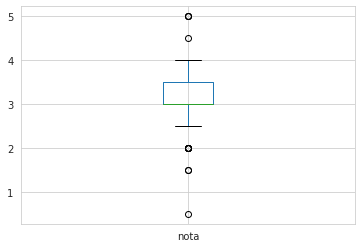

count    49.000000
mean      3.071429
std       0.907148
min       0.500000
25%       3.000000
50%       3.000000
75%       3.500000
max       5.000000
Name: nota, dtype: float64

In [0]:
plota_grafico(5)

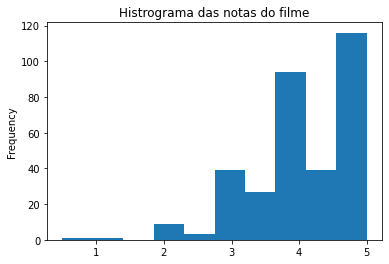

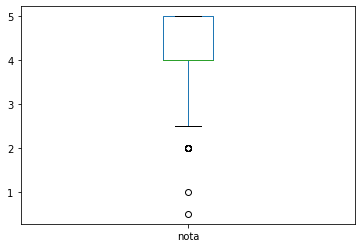

count    329.000000
mean       4.164134
std        0.831244
min        0.500000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: nota, dtype: float64

In [0]:
plota_grafico(356)

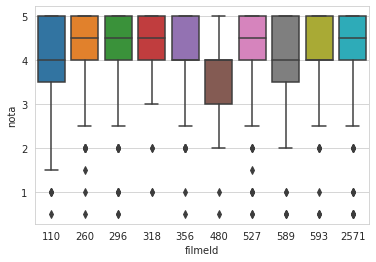

In [0]:
avaliacoes_de_alguns_filmes=avaliacoes.query('filmeId in [356, 318, 296, 593, 2571, 260, 480, 110, 589, 527]')
sns.boxplot(data=avaliacoes_de_alguns_filmes, 
            x=avaliacoes_de_alguns_filmes['filmeId'],
            y=avaliacoes_de_alguns_filmes['nota'])
plt.show()

## Desafios

### Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.



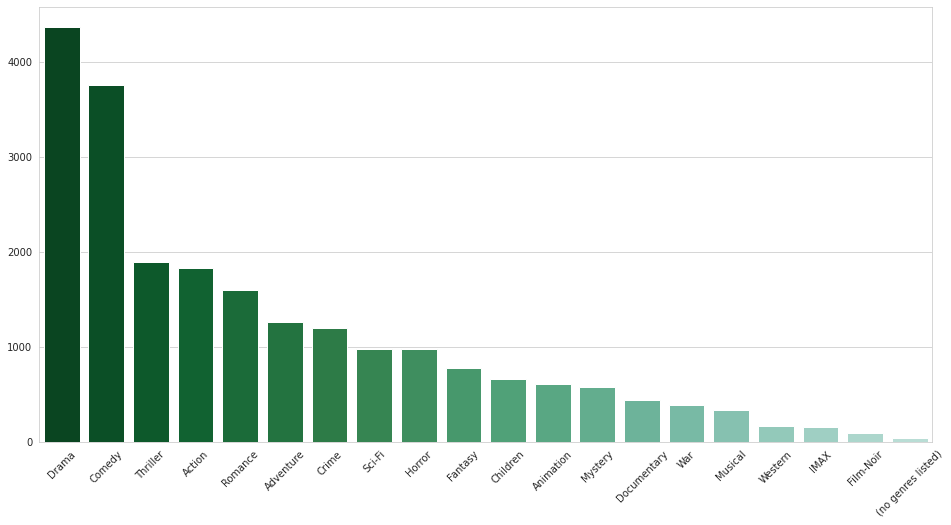

In [0]:
plt.figure(figsize=(16,8))
sns.barplot(x=filmes_por_genero.index, 
            y=filmes_por_genero.values,
            palette=sns.color_palette('BuGn_r', n_colors=len(filmes_por_genero)+8))
sns.set_style("whitegrid")
plt.xticks(rotation=45)
plt.show()

### Encontar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(n) para plotar.



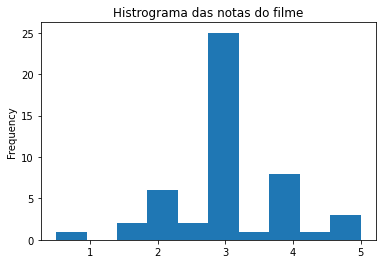

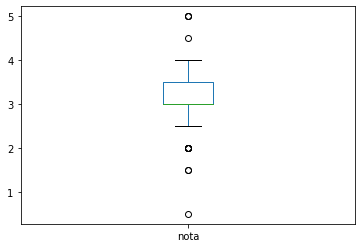

count    49.000000
mean      3.071429
std       0.907148
min       0.500000
25%       3.000000
50%       3.000000
75%       3.500000
max       5.000000
Name: nota, dtype: float64

In [0]:
plota_grafico(5)

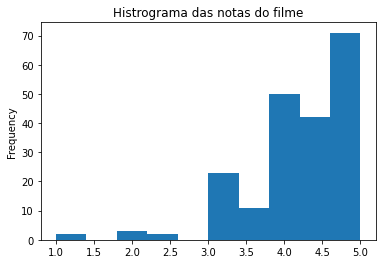

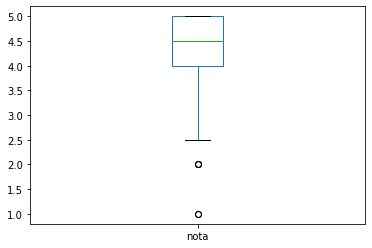

count    204.000000
mean       4.237745
std        0.800921
min        1.000000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: nota, dtype: float64

In [0]:
plota_grafico(50)

### Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.



In [0]:
top_dez= filmes_com_medias_e_votos.sort_values('total_de_votos', ascending=False).head(10)
top_dez_titulos=top_dez['titulo'].to_list()
top_dez_titulos

['Forrest Gump (1994)',
 'Shawshank Redemption, The (1994)',
 'Pulp Fiction (1994)',
 'Silence of the Lambs, The (1991)',
 'Matrix, The (1999)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Jurassic Park (1993)',
 'Braveheart (1995)',
 'Terminator 2: Judgment Day (1991)',
 "Schindler's List (1993)"]

In [0]:
top_dez_filmeIds=top_dez['filmeId'].to_list()
top_dez_filmeIds

[356, 318, 296, 593, 2571, 260, 480, 110, 589, 527]

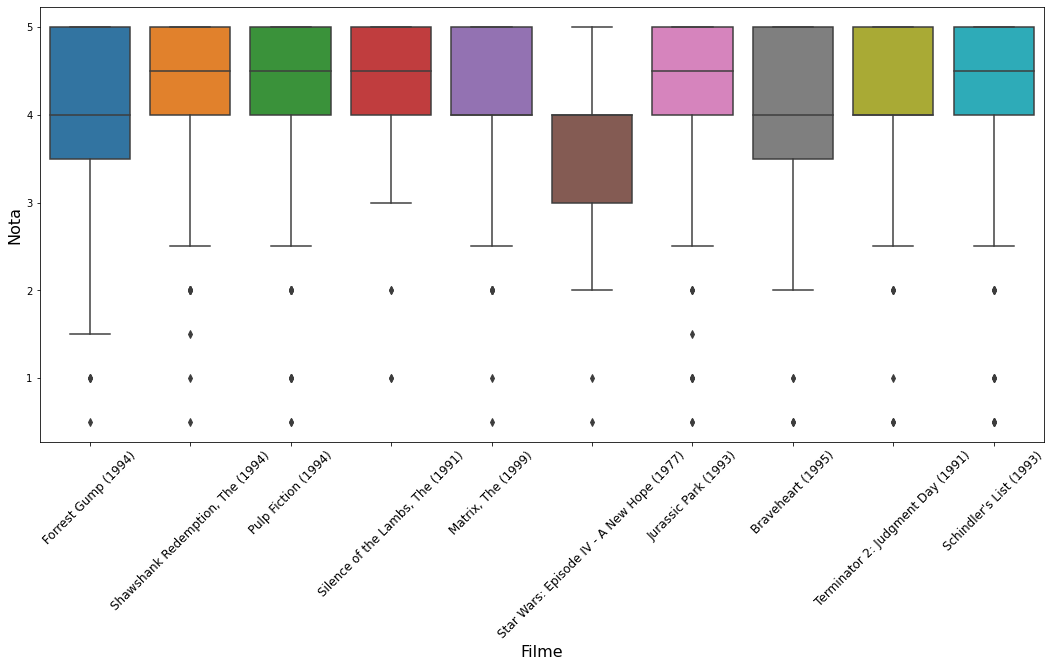

In [0]:
plt.figure(figsize=(18, 8))
ax = sns.boxplot(x='filmeId', y='nota', data=avaliacoes.query(f"filmeId in {top_dez_filmeIds}"))
ax.set_xticklabels(top_dez_titulos, fontsize=12)
ax.set_xlabel("Filme", fontsize=16)
ax.set_ylabel("Nota", fontsize=16)
plt.xticks(rotation=45)

plt.show()

### Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.



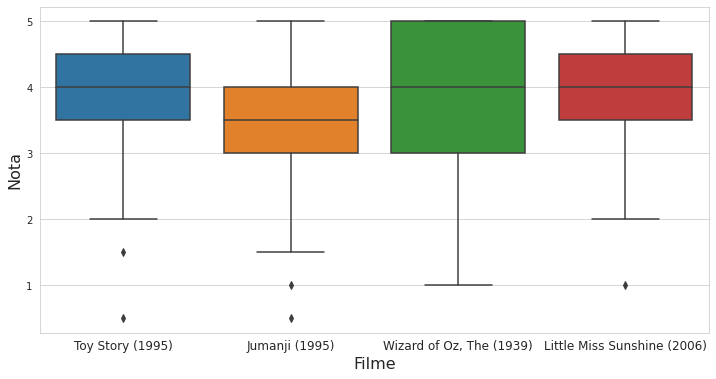

In [0]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x="filmeId", y="nota")

ax.set_xticklabels(filmes.query("filmeId in [1,2,919,46578]")['titulo'], fontsize=12)
ax.set_xlabel("Filme", fontsize=16)
ax.set_ylabel("Nota", fontsize=16)
plt.show()